<a href="https://colab.research.google.com/github/ChengYao0209/ALdea_milk/blob/main/%E7%89%9B%E7%89%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
!unzip -uq /content/drive/MyDrive/DataScience/台灣牧場乳量預測/data.zip -d /content/

In [220]:
birth=pd.read_csv("birth.csv",sep=",")
breed=pd.read_csv("breed.csv",sep=",")
report=pd.read_csv("report.csv",sep=",")
spec=pd.read_csv("spec.csv",sep=",")
sub=pd.read_csv("submission.csv",sep=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [221]:
print("The shape of birth : ",birth.shape)
print("The shape of breed : ",breed.shape)
print("The shape of report : ",report.shape)
print("The shape of spec : ",spec.shape)

The shape of birth :  (3761, 13)
The shape of breed :  (21050, 8)
The shape of report :  (37517, 21)
The shape of spec :  (4362, 7)


稍微看一下每個表的缺失狀況

In [222]:
print(report.isnull().sum())

1         0
2         0
3         0
4         0
5         0
6       876
7      3584
8         0
9         0
10        1
11     4263
12        1
13        0
14        0
15        0
16     1536
17     1536
18        0
19    17420
20     1431
21     1431
dtype: int64


In [223]:
print(birth.isnull().sum())

1        0
2        0
3     1637
4     2907
5     3753
6     3051
7        0
8        0
9        0
10     903
11    3408
12    2802
13       0
dtype: int64


In [224]:
print(breed.isnull().sum())

1        0
2        0
3        0
4        0
5        0
6    20837
7    20822
8        0
dtype: int64


In [225]:
print(spec.isnull().sum())

1       0
2       0
3     613
4       0
5    3165
6    1258
7       0
dtype: int64


In [226]:
report.head(10)

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,...,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,...,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,...,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,...,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,...,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
5,6,2013,8,A,52612,507H7173,96040545,2011/1/1 00:00,1,239.0,...,2013/1/1 00:00,2013/8/28 00:00,31,2013/8/29 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
6,7,2013,10,A,52612,507H7173,96040545,2011/1/1 00:00,1,281.0,...,2013/1/1 00:00,2013/10/9 00:00,33,2013/10/11 00:00,2015/5/5 00:00,507H11621,3,NaN,2013/3/5 00:00,501H8784
7,8,2013,11,A,52612,507H7173,96040545,2011/1/1 00:00,1,311.0,...,2013/1/1 00:00,2013/11/8 00:00,34,2013/11/12 00:00,2015/5/5 00:00,507H11621,3,NaN,2013/3/5 00:00,501H8784
8,9,2013,12,A,52612,507H7173,96040545,2011/1/1 00:00,1,337.0,...,2013/1/1 00:00,2013/12/4 00:00,35,2013/12/5 00:00,2015/5/5 00:00,507H11621,3,NaN,2013/3/5 00:00,501H8784
9,10,2014,1,A,52612,507H7173,96040545,2011/1/1 00:00,1,370.0,...,2013/1/1 00:00,2014/1/6 00:00,36,2014/1/8 00:00,2015/5/5 00:00,507H11621,4,NaN,2013/3/5 00:00,501H8784


In [227]:
sub_data = pd.DataFrame(columns=report.columns)
idx = 0
for i in report['1']:
  for j in sub['ID']:
    if i == j:
      for c in sub_data.columns:
        sub_data.loc[idx, str(c)] = report[str(c)][i-1]
      idx = idx + 1
sub_data.head(10)

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,480,2019,1,A,52631,501H9952,97040152,2011/3/17 00:00,4,435.0,...,2017/11/1 00:00,2019/1/10 00:00,94,2019/1/15 00:00,2019/2/3 00:00,551HO00657,6,2016/8/4 00:00,2018/1/6 00:00,614HO07276
1,742,2019,2,A,52640,501H9952,96040567,2011/4/1 00:00,4,13.0,...,2019/1/29 00:00,2019/2/11 00:00,94,2019/2/12 00:00,2019/2/28 00:00,551HO00695,0,2017/6/17 00:00,2019/2/28 00:00,551HO00695
2,743,2019,3,A,52640,501H9952,96040567,2011/4/1 00:00,4,35.0,...,2019/1/29 00:00,2019/3/5 00:00,95,2019/3/6 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
3,744,2019,4,A,52640,501H9952,96040567,2011/4/1 00:00,4,70.0,...,2019/1/29 00:00,2019/4/9 00:00,96,2019/4/11 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
4,745,2019,5,A,52640,501H9952,96040567,2011/4/1 00:00,4,98.0,...,2019/1/29 00:00,2019/5/7 00:00,97,2019/5/9 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
5,793,2019,2,A,52641,614H5010,97040119,2011/4/2 00:00,6,279.0,...,2018/5/8 00:00,2019/2/11 00:00,94,2019/2/12 00:00,2018/7/29 00:00,507HO12236,1,2017/7/4 00:00,2018/7/29 00:00,507HO12236
6,794,2019,1,A,52641,614H5010,97040119,2011/4/2 00:00,6,247.0,...,2018/5/8 00:00,2019/1/10 00:00,93,2019/1/15 00:00,2018/7/29 00:00,507HO12236,1,2017/7/4 00:00,2018/7/29 00:00,507HO12236
7,800,2019,5,A,52641,614H5010,97040119,2011/4/2 00:00,7,12.0,...,2019/4/25 00:00,2019/5/7 00:00,97,2019/5/9 00:00,NaN,NaN,0,2018/5/8 00:00,NaN,NaN
8,801,2019,6,A,52641,614H5010,97040119,2011/4/2 00:00,7,39.0,...,2019/4/25 00:00,2019/6/3 00:00,98,2019/6/5 00:00,NaN,NaN,0,2018/5/8 00:00,NaN,NaN
9,802,2019,7,A,52641,614H5010,97040119,2011/4/2 00:00,7,67.0,...,2019/4/25 00:00,2019/7/1 00:00,99,2019/7/2 00:00,NaN,NaN,0,2018/5/8 00:00,NaN,NaN


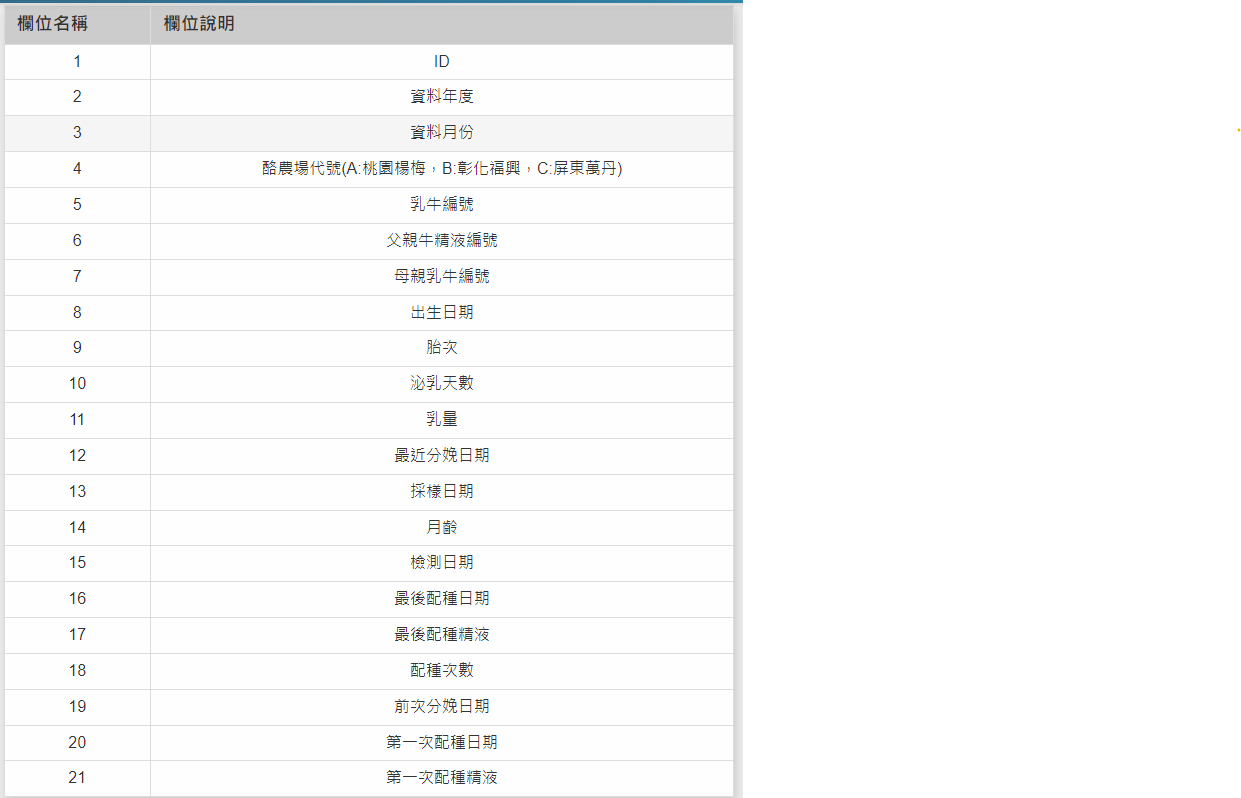


表跟feature實在有點多，從官網上面提供的資料我想先找一些我覺得可以用到的feature
現階段我想先找的是

1.資料年度/月份 (我記得牛乳分泌在夏天冬天會不一樣，會受到當時氣溫干擾)

2.牛牛的父母 (基因層面)

3.地點 (不同農場的飼養方法我想可能不一樣)

4.分娩相關資訊

從column 來看的話是2,3,4,5,6,7,9,10,11,14,18,21


生成第一版的訓練用資料和submit資料~~

In [228]:
train_data=pd.DataFrame(data=report,columns=["2","3","4","5","6","7","9","10","11","14","18","21",'season','year','Sick','weight'])
sub_data=pd.DataFrame(data=sub_data,columns=["2","3","4","5","6","7","9","10","14","18","21",'season','year','Sick','weight'])
train_data=train_data.rename(columns={
    "2":"資料年度",
    "3":"資料月份",
    "4":"酪農場代號",
    "5":"乳牛編號",
    "6":"父親牛精液編號",
    "7":"母親乳牛編號",
    "9":"胎次",
    "10":"泌乳天數",
    "11":"乳量",
    "14":"月齡",
    "18":"配種次數",
    "21":"第一次配種精液",
})
sub_data=sub_data.rename(columns={
    "2":"資料年度",
    "3":"資料月份",
    "4":"酪農場代號",
    "5":"乳牛編號",
    "6":"父親牛精液編號",
    "7":"母親乳牛編號",
    "9":"胎次",
    "10":"泌乳天數",
    "14":"月齡",
    "18":"配種次數",
    "21":"第一次配種精液",
})


train_data.head(10)



,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,乳量,月齡,配種次數,第一次配種精液,season,year,Sick,weight
0,2013,3,A,52612,507H7173,96040545,1,78.0,29.4,26,1,501H8784,NaN,NaN,NaN,NaN
1,2013,4,A,52612,507H7173,96040545,1,107.0,27.8,27,1,501H8784,NaN,NaN,NaN,NaN
2,2013,5,A,52612,507H7173,96040545,1,140.0,9.0,28,2,501H8784,NaN,NaN,NaN,NaN
3,2013,6,A,52612,507H7173,96040545,1,175.0,13.0,29,2,501H8784,NaN,NaN,NaN,NaN
4,2013,7,A,52612,507H7173,96040545,1,210.0,13.2,30,2,501H8784,NaN,NaN,NaN,NaN
5,2013,8,A,52612,507H7173,96040545,1,239.0,15.7,31,2,501H8784,NaN,NaN,NaN,NaN
6,2013,10,A,52612,507H7173,96040545,1,281.0,12.8,33,3,501H8784,NaN,NaN,NaN,NaN
7,2013,11,A,52612,507H7173,96040545,1,311.0,8.8,34,3,501H8784,NaN,NaN,NaN,NaN
8,2013,12,A,52612,507H7173,96040545,1,337.0,9.0,35,3,501H8784,NaN,NaN,NaN,NaN
9,2014,1,A,52612,507H7173,96040545,1,370.0,5.0,36,4,501H8784,NaN,NaN,NaN,NaN


In [229]:

sub_data.head(10)

,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,月齡,配種次數,第一次配種精液,season,year,Sick,weight
0,2019,1,A,52631,501H9952,97040152,4,435.0,94,6,614HO07276,NaN,NaN,NaN,NaN
1,2019,2,A,52640,501H9952,96040567,4,13.0,94,0,551HO00695,NaN,NaN,NaN,NaN
2,2019,3,A,52640,501H9952,96040567,4,35.0,95,1,551HO00695,NaN,NaN,NaN,NaN
3,2019,4,A,52640,501H9952,96040567,4,70.0,96,1,551HO00695,NaN,NaN,NaN,NaN
4,2019,5,A,52640,501H9952,96040567,4,98.0,97,1,551HO00695,NaN,NaN,NaN,NaN
5,2019,2,A,52641,614H5010,97040119,6,279.0,94,1,507HO12236,NaN,NaN,NaN,NaN
6,2019,1,A,52641,614H5010,97040119,6,247.0,93,1,507HO12236,NaN,NaN,NaN,NaN
7,2019,5,A,52641,614H5010,97040119,7,12.0,97,0,NaN,NaN,NaN,NaN,NaN
8,2019,6,A,52641,614H5010,97040119,7,39.0,98,0,NaN,NaN,NaN,NaN,NaN
9,2019,7,A,52641,614H5010,97040119,7,67.0,99,0,NaN,NaN,NaN,NaN,NaN


再見了，乳量那邊如果是沒有資料或是為0的就等於沒有用

In [230]:
train_data = train_data.dropna(subset=["乳量"])
train_data.reset_index(inplace=True)

In [231]:
for i in range(len(train_data["乳量"])):
  if train_data["乳量"][i] == 0:
    train_data=train_data.drop([i]) #把乳量為0的那排直接槓掉,axis=0
    
train_data.reset_index(inplace=True)
train_data.isna().sum()

level_0        0
index          0
資料年度           0
資料月份           0
酪農場代號          0
乳牛編號           0
父親牛精液編號      628
母親乳牛編號      3245
胎次             0
泌乳天數           1
乳量             0
月齡             0
配種次數           0
第一次配種精液     1018
season     33186
year       33186
Sick       33186
weight     33186
dtype: int64

In [232]:
train_data["year"]=train_data["資料年度"]
sub_data["year"]=sub_data["資料年度"]

In [233]:
train_data.head(10)

,level_0,index,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,乳量,月齡,配種次數,第一次配種精液,season,year,Sick,weight
0,0,0,2013,3,A,52612,507H7173,96040545,1,78.0,29.4,26,1,501H8784,NaN,2013,NaN,NaN
1,1,1,2013,4,A,52612,507H7173,96040545,1,107.0,27.8,27,1,501H8784,NaN,2013,NaN,NaN
2,2,2,2013,5,A,52612,507H7173,96040545,1,140.0,9.0,28,2,501H8784,NaN,2013,NaN,NaN
3,3,3,2013,6,A,52612,507H7173,96040545,1,175.0,13.0,29,2,501H8784,NaN,2013,NaN,NaN
4,4,4,2013,7,A,52612,507H7173,96040545,1,210.0,13.2,30,2,501H8784,NaN,2013,NaN,NaN
5,5,5,2013,8,A,52612,507H7173,96040545,1,239.0,15.7,31,2,501H8784,NaN,2013,NaN,NaN
6,6,6,2013,10,A,52612,507H7173,96040545,1,281.0,12.8,33,3,501H8784,NaN,2013,NaN,NaN
7,7,7,2013,11,A,52612,507H7173,96040545,1,311.0,8.8,34,3,501H8784,NaN,2013,NaN,NaN
8,8,8,2013,12,A,52612,507H7173,96040545,1,337.0,9.0,35,3,501H8784,NaN,2013,NaN,NaN
9,9,9,2014,1,A,52612,507H7173,96040545,1,370.0,5.0,36,4,501H8784,NaN,2014,NaN,NaN


處理缺失值之前，我想多加一點資訊
我想增加像是當時是否有疾病或是其他的(要從其他地方找)

In [234]:
#從SPEC 表裡面找一下，牛牛是否有生病

from datetime import datetime 
#1999/8/24  12:00:00 AM 日期是長這個,等等拿來拆開
#先找說這隻牛有沒有生病，如果spec裡面有紀錄的話在檢查時間有沒有對上。如果有的話就給1，沒有給0
for i in range(len(spec)):
  day=datetime.strptime(spec["4"][i],"%Y/%m/%d %H:%M")
  if len(train_data.index[train_data["乳牛編號"] == spec["1"][i]])>0:
    for j in train_data.index[train_data["乳牛編號"] == spec["1"][i]]:
      if train_data["year"][j] == day.year and train_data['資料月份'][j] == day.month and train_data["酪農場代號"][j]==spec["7"][i]:
        train_data["Sick"][j] = 1
  if len(sub_data.index[sub_data["乳牛編號"] == spec["1"][i]])>0:
    for j in sub_data.index[sub_data['乳牛編號'] == spec["1"][i]]:
      if sub_data["year"][j] == day.year and sub_data["資料月份"][j] == day.month and sub_data["酪農場代號"][j]==spec["7"][i]:
        sub_data["Sick"][j] = 1

train_data["Sick"].fillna(0,inplace=True) #當初沒有配對到的應該就是產乳時是健康的
sub_data["Sick"].fillna(0,inplace=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [235]:
#考慮每隻牛牛重量不同，有人身強體壯可以產很多乳，有些瘦弱可能沒那麼多能量

avgw = birth["6"].mean()
birth["6"] = birth["6"].fillna(avgw)
for i in range(len(birth)):
  if len(train_data.index[train_data["乳牛編號"] == birth["1"][i]]) > 0:
    for j in train_data.index[train_data["乳牛編號"] == birth["1"][i]]:
      train_data.loc[j,"weight"] = round(birth["6"][i],2)

  if len(sub_data.index[sub_data["乳牛編號"] == birth["1"][i]]) > 0:
    for j in sub_data.index[sub_data["乳牛編號"] == birth["1"][i]]:
      sub_data.loc[j,"weight"] = round(birth["6"][i],2)
avgw = birth["6"].mean()
train_data["weight"].fillna(avgw,inplace=True)
sub_data["weight"].fillna(avgw,inplace=True)


In [236]:
train_data.isna().sum()

level_0        0
index          0
資料年度           0
資料月份           0
酪農場代號          0
乳牛編號           0
父親牛精液編號      628
母親乳牛編號      3245
胎次             0
泌乳天數           1
乳量             0
月齡             0
配種次數           0
第一次配種精液     1018
season     33186
year           0
Sick           0
weight         0
dtype: int64

In [237]:
#處理一下月份~~變成春夏秋冬之後在OHE比較好。單純用月份的話是數字可能會有上下關係

for i in range(len(train_data)):
  if train_data["資料月份"][i] >=3 and train_data["資料月份"][i] <= 5:
    train_data["season"][i] = "Spring"
  elif train_data["資料月份"][i] >=6 and train_data["資料月份"][i] <= 8:
    train_data["season"][i] = "Summer"
  elif train_data["資料月份"][i] >=9 and train_data["資料月份"][i] <= 11:
    train_data["season"][i] = "Autumn"
  else :
    train_data["season"][i] = "Winter"
for i in range(len(sub_data)):
  if sub_data["資料月份"][i] >=3 and sub_data["資料月份"][i] <= 5:
    sub_data["season"][i] = "Spring"
  elif sub_data["資料月份"][i] >=6 and sub_data["資料月份"][i] <= 8:
    sub_data["season"][i] = "Summer"
  elif sub_data["資料月份"][i] >=9 and sub_data["資料月份"][i] <= 11:
    sub_data["season"][i] = "Autumn"
  else :
    sub_data["season"][i] = "Winter"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


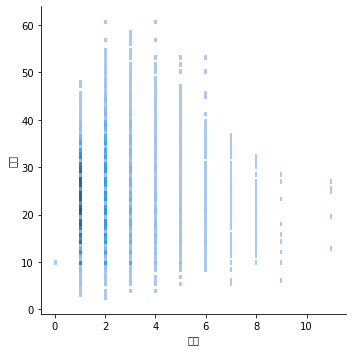

In [238]:
sns.displot(
    train_data, x="胎次",y="乳量"
)

雖然有點粗糙，不過我想從
1.生的胎數
2.泌乳天數
和乳量也是有關的
看起來胎數和天數越多,乳量越少(可能被榨乾ㄌ)


In [239]:
train_data.isna().sum()

level_0       0
index         0
資料年度          0
資料月份          0
酪農場代號         0
乳牛編號          0
父親牛精液編號     628
母親乳牛編號     3245
胎次            0
泌乳天數          1
乳量            0
月齡            0
配種次數          0
第一次配種精液    1018
season        0
year          0
Sick          0
weight        0
dtype: int64

In [240]:
y = train_data["乳量"]
y

0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
33181    20.0
33182    21.0
33183    19.0
33184    12.0
33185    10.0
Name: 乳量, Length: 33186, dtype: float64

In [241]:
X_train=train_data.copy()
X_sub=sub_data.copy()

In [242]:
X_train=pd.DataFrame(train_data,columns=["酪農場代號","乳牛編號","胎次","月齡","配種次數","泌乳天數","season","Sick","weight"])
X_sub=pd.DataFrame(sub_data,columns=["酪農場代號","乳牛編號","胎次","月齡","配種次數","泌乳天數","season","Sick","weight"])

In [243]:
X_train

,酪農場代號,乳牛編號,胎次,月齡,配種次數,泌乳天數,season,Sick,weight
0,A,52612,1,26,1,78.0,Spring,0.0,576.58
1,A,52612,1,27,1,107.0,Spring,0.0,576.58
2,A,52612,1,28,2,140.0,Spring,0.0,576.58
3,A,52612,1,29,2,175.0,Summer,0.0,576.58
4,A,52612,1,30,2,210.0,Summer,0.0,576.58
...,...,...,...,...,...,...,...,...,...
33181,C,93184912,8,130,0,12.0,Winter,0.0,725.00
33182,C,93184912,8,134,0,137.0,Spring,0.0,725.00
33183,C,93184912,8,135,0,168.0,Summer,0.0,725.00
33184,C,93184912,8,136,0,197.0,Summer,0.0,725.00


In [244]:
X_sub

,酪農場代號,乳牛編號,胎次,月齡,配種次數,泌乳天數,season,Sick,weight
0,A,52631,4,94,6,435.0,Winter,0.0,576.58
1,A,52640,4,94,0,13.0,Winter,0.0,576.58
2,A,52640,4,95,1,35.0,Spring,0.0,576.58
3,A,52640,4,96,1,70.0,Spring,0.0,576.58
4,A,52640,4,97,1,98.0,Spring,1.0,576.58
...,...,...,...,...,...,...,...,...,...
4258,C,6187446,1,24,0,15.0,Summer,0.0,540.00
4259,C,6187448,1,24,0,22.0,Summer,0.0,490.00
4260,C,6187449,1,22,0,21.0,Summer,0.0,540.00
4261,C,6187449,1,23,0,51.0,Summer,0.0,540.00


In [245]:
all=pd.concat([X_train,X_sub])


這邊要注意一下
雖然說一個是訓練用的一個是測試用的
但是在encode的時候要一起做~~
不然在feature的數量上可能會有問題而無法預測~
最後在切開就好ㄌ

In [246]:
from sklearn.preprocessing import LabelEncoder
labelencodder=LabelEncoder()



all["酪農場代號"]=labelencodder.fit_transform(all["酪農場代號"])
all["season"]=labelencodder.fit_transform(all["season"])
all["乳牛編號"]=labelencodder.fit_transform(all["乳牛編號"])
all["Sick"]=labelencodder.fit_transform(all["Sick"])



X_train=all[:len(X_train)]
X_sub=all[len(X_train)::]

In [247]:
X_train

,酪農場代號,乳牛編號,胎次,月齡,配種次數,泌乳天數,season,Sick,weight
0,0,0,1,26,1,78.0,1,0,576.58
1,0,0,1,27,1,107.0,1,0,576.58
2,0,0,1,28,2,140.0,1,0,576.58
3,0,0,1,29,2,175.0,2,0,576.58
4,0,0,1,30,2,210.0,2,0,576.58
...,...,...,...,...,...,...,...,...,...
33181,2,1570,8,130,0,12.0,3,0,725.00
33182,2,1570,8,134,0,137.0,1,0,725.00
33183,2,1570,8,135,0,168.0,2,0,725.00
33184,2,1570,8,136,0,197.0,2,0,725.00


In [248]:
X_sub

,酪農場代號,乳牛編號,胎次,月齡,配種次數,泌乳天數,season,Sick,weight
0,0,15,4,94,6,435.0,3,0,576.58
1,0,24,4,94,0,13.0,3,0,576.58
2,0,24,4,95,1,35.0,1,0,576.58
3,0,24,4,96,1,70.0,1,0,576.58
4,0,24,4,97,1,98.0,1,1,576.58
...,...,...,...,...,...,...,...,...,...
4258,2,1462,1,24,0,15.0,2,0,540.00
4259,2,1463,1,24,0,22.0,2,0,490.00
4260,2,1464,1,22,0,21.0,2,0,540.00
4261,2,1464,1,23,0,51.0,2,0,540.00


In [249]:
all

,酪農場代號,乳牛編號,胎次,月齡,配種次數,泌乳天數,season,Sick,weight
0,0,0,1,26,1,78.0,1,0,576.58
1,0,0,1,27,1,107.0,1,0,576.58
2,0,0,1,28,2,140.0,1,0,576.58
3,0,0,1,29,2,175.0,2,0,576.58
4,0,0,1,30,2,210.0,2,0,576.58
...,...,...,...,...,...,...,...,...,...
4258,2,1462,1,24,0,15.0,2,0,540.00
4259,2,1463,1,24,0,22.0,2,0,490.00
4260,2,1464,1,22,0,21.0,2,0,540.00
4261,2,1464,1,23,0,51.0,2,0,540.00


In [250]:
#all=pd.get_dummies(all,columns=["酪農場代號","乳牛編號","Sick","season","胎次"])
#X=all[0:len(X_train)]
#X_sub=all[len(X_train)::]
#all=pd.concat([X_train,X_sub])

#把要的類別轉換成One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')

ohe.fit(all)
X=ohe.transform(X_train).toarray()
X_test=ohe.transform(X_sub).toarray()


In [251]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33181,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33183,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33184,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [252]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [253]:
from keras import backend as k
def error(y_pred,y_true):
  return k.sqrt(k.mean(k.square(y_pred - y_true)))

In [254]:
dim=X.shape[1]
print(dim)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


3096
(26548, 3096)
(6638, 3096)
(26548,)
(6638,)


In [255]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import Adam

model=Sequential()
model.add(Dense(2048,input_dim=dim,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss=error,optimizer=Adam(lr=1e-3),metrics=[error])





/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [256]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=10,verbose=1)

Epoch 1/10
415/415 [==============================] - 3s 6ms/step - loss: 6.6161 - error: 6.6150 - val_loss: 5.7674 - val_error: 5.7690
Epoch 2/10
415/415 [==============================] - 2s 5ms/step - loss: 5.1595 - error: 5.1593 - val_loss: 5.3051 - val_error: 5.3046
Epoch 3/10
415/415 [==============================] - 2s 5ms/step - loss: 4.2113 - error: 4.2111 - val_loss: 5.1781 - val_error: 5.1771
Epoch 4/10
415/415 [==============================] - 2s 4ms/step - loss: 3.2299 - error: 3.2300 - val_loss: 5.3028 - val_error: 5.3011
Epoch 5/10
415/415 [==============================] - 2s 5ms/step - loss: 2.5986 - error: 2.5987 - val_loss: 5.1455 - val_error: 5.1445
Epoch 6/10
415/415 [==============================] - 2s 5ms/step - loss: 2.2089 - error: 2.2089 - val_loss: 5.0677 - val_error: 5.0661
Epoch 7/10
415/415 [==============================] - 2s 5ms/step - loss: 1.9433 - error: 1.9433 - val_loss: 5.1507 - val_error: 5.1494
Epoch 8/10
415/415 [============================

134/134 [==============================] - 0s 2ms/step


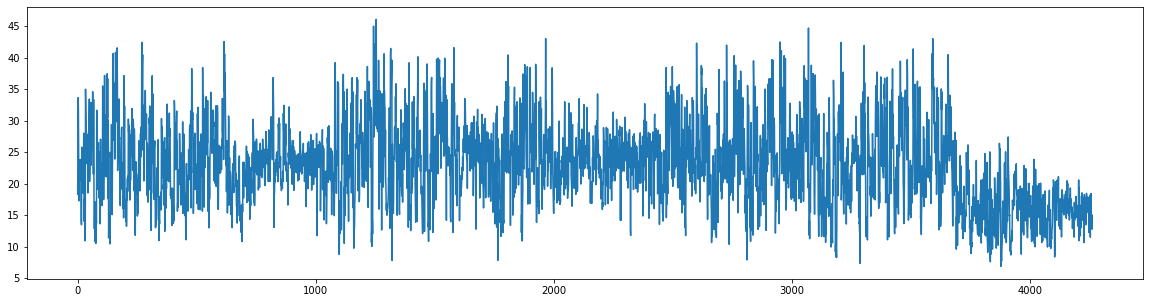

In [257]:
prediction=model.predict(X_test)
#prediction=model.predict(new_test)
plt.figure(figsize=(20,5))
plt.plot(prediction)

In [258]:


sub['1']=prediction
sub.to_csv('prediction.csv',index=False)

In [259]:
sub

,ID,1
0,480,18.302492
1,742,27.562960
2,743,33.660988
3,744,32.032001
4,745,24.840019
...,...,...
4258,37481,12.842931
4259,37482,13.495915
4260,37483,14.597404
4261,37484,15.035437
